In [2]:
!pip install lightfm

In [3]:
from lightfm import LightFM

model = LightFM()
print(" LightFM installed and ready!")


 LightFM installed and ready!


c:\Users\edwin\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import os

# Detect environment and set appropriate dataset path
try:
    # Check if running on Kaggle
    if '/kaggle/' in os.getcwd():
        dataset_path = "/kaggle/input/movielens"
        print("Running on Kaggle - using Kaggle dataset path")
    else:
        dataset_path = r"C:\Users\edwin\dataset movies\ml-100k"
        print("Running locally - using local dataset path")
except:
    # Default to local path if detection fails
    dataset_path = r"C:\Users\edwin\dataset movies\ml-100k"
    print("Environment detection failed - defaulting to local path")

print(f"Dataset path: {dataset_path}")

# Load u.data (ratings data)
# Columns: user_id, item_id, rating, timestamp
u_data = pd.read_csv(os.path.join(dataset_path, "u.data"), 
                     sep='\t', 
                     names=['user_id', 'item_id', 'rating', 'timestamp'],
                     header=None)

# Load u.user (user information)
# Columns: user_id, age, gender, occupation, zip_code
u_user = pd.read_csv(os.path.join(dataset_path, "u.user"), 
                     sep='|', 
                     names=['user_id', 'age', 'gender', 'occupation', 'zip_code'],
                     header=None)

# Load u.item (movie information)
# Columns: movie_id, title, release_date, video_release_date, imdb_url, and genre columns
item_columns = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url'] + \
               [f'genre_{i}' for i in range(19)]  # 19 genre columns

u_item = pd.read_csv(os.path.join(dataset_path, "u.item"), 
                     sep='|', 
                     names=item_columns,
                     header=None,
                     encoding='latin1')  # Handle special characters

# Load u.genre (genre information)
# Columns: genre, genre_id
u_genre = pd.read_csv(os.path.join(dataset_path, "u.genre"), 
                      sep='|', 
                      names=['genre', 'genre_id'],
                      header=None)

print("Dataset loaded successfully!")
print(f"u.data shape: {u_data.shape}")
print(f"u.user shape: {u_user.shape}")
print(f"u.item shape: {u_item.shape}")
print(f"u.genre shape: {u_genre.shape}")

Running locally - using local dataset path
Dataset path: C:\Users\edwin\dataset movies\ml-100k
Dataset loaded successfully!
u.data shape: (100000, 4)
u.user shape: (943, 5)
u.item shape: (1682, 24)
u.genre shape: (19, 2)


Creating visualizations for u.data (Ratings)...
Creating visualizations for u.user (Users)...
Creating visualizations for u.item (Movies)...
Creating combined analysis visualizations...
Creating visualizations for u.user (Users)...
Creating visualizations for u.item (Movies)...
Creating combined analysis visualizations...


C:\Users\edwin\AppData\Local\Temp\ipykernel_10416\343793773.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=user_gender_ratings, x='gender', y='rating', palette=['lightblue', 'pink'])
C:\Users\edwin\AppData\Local\Temp\ipykernel_10416\343793773.py:122: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg = user_age_ratings.groupby('age_group')['rating'].mean()
C:\Users\edwin\AppData\Local\Temp\ipykernel_10416\343793773.py:122: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default

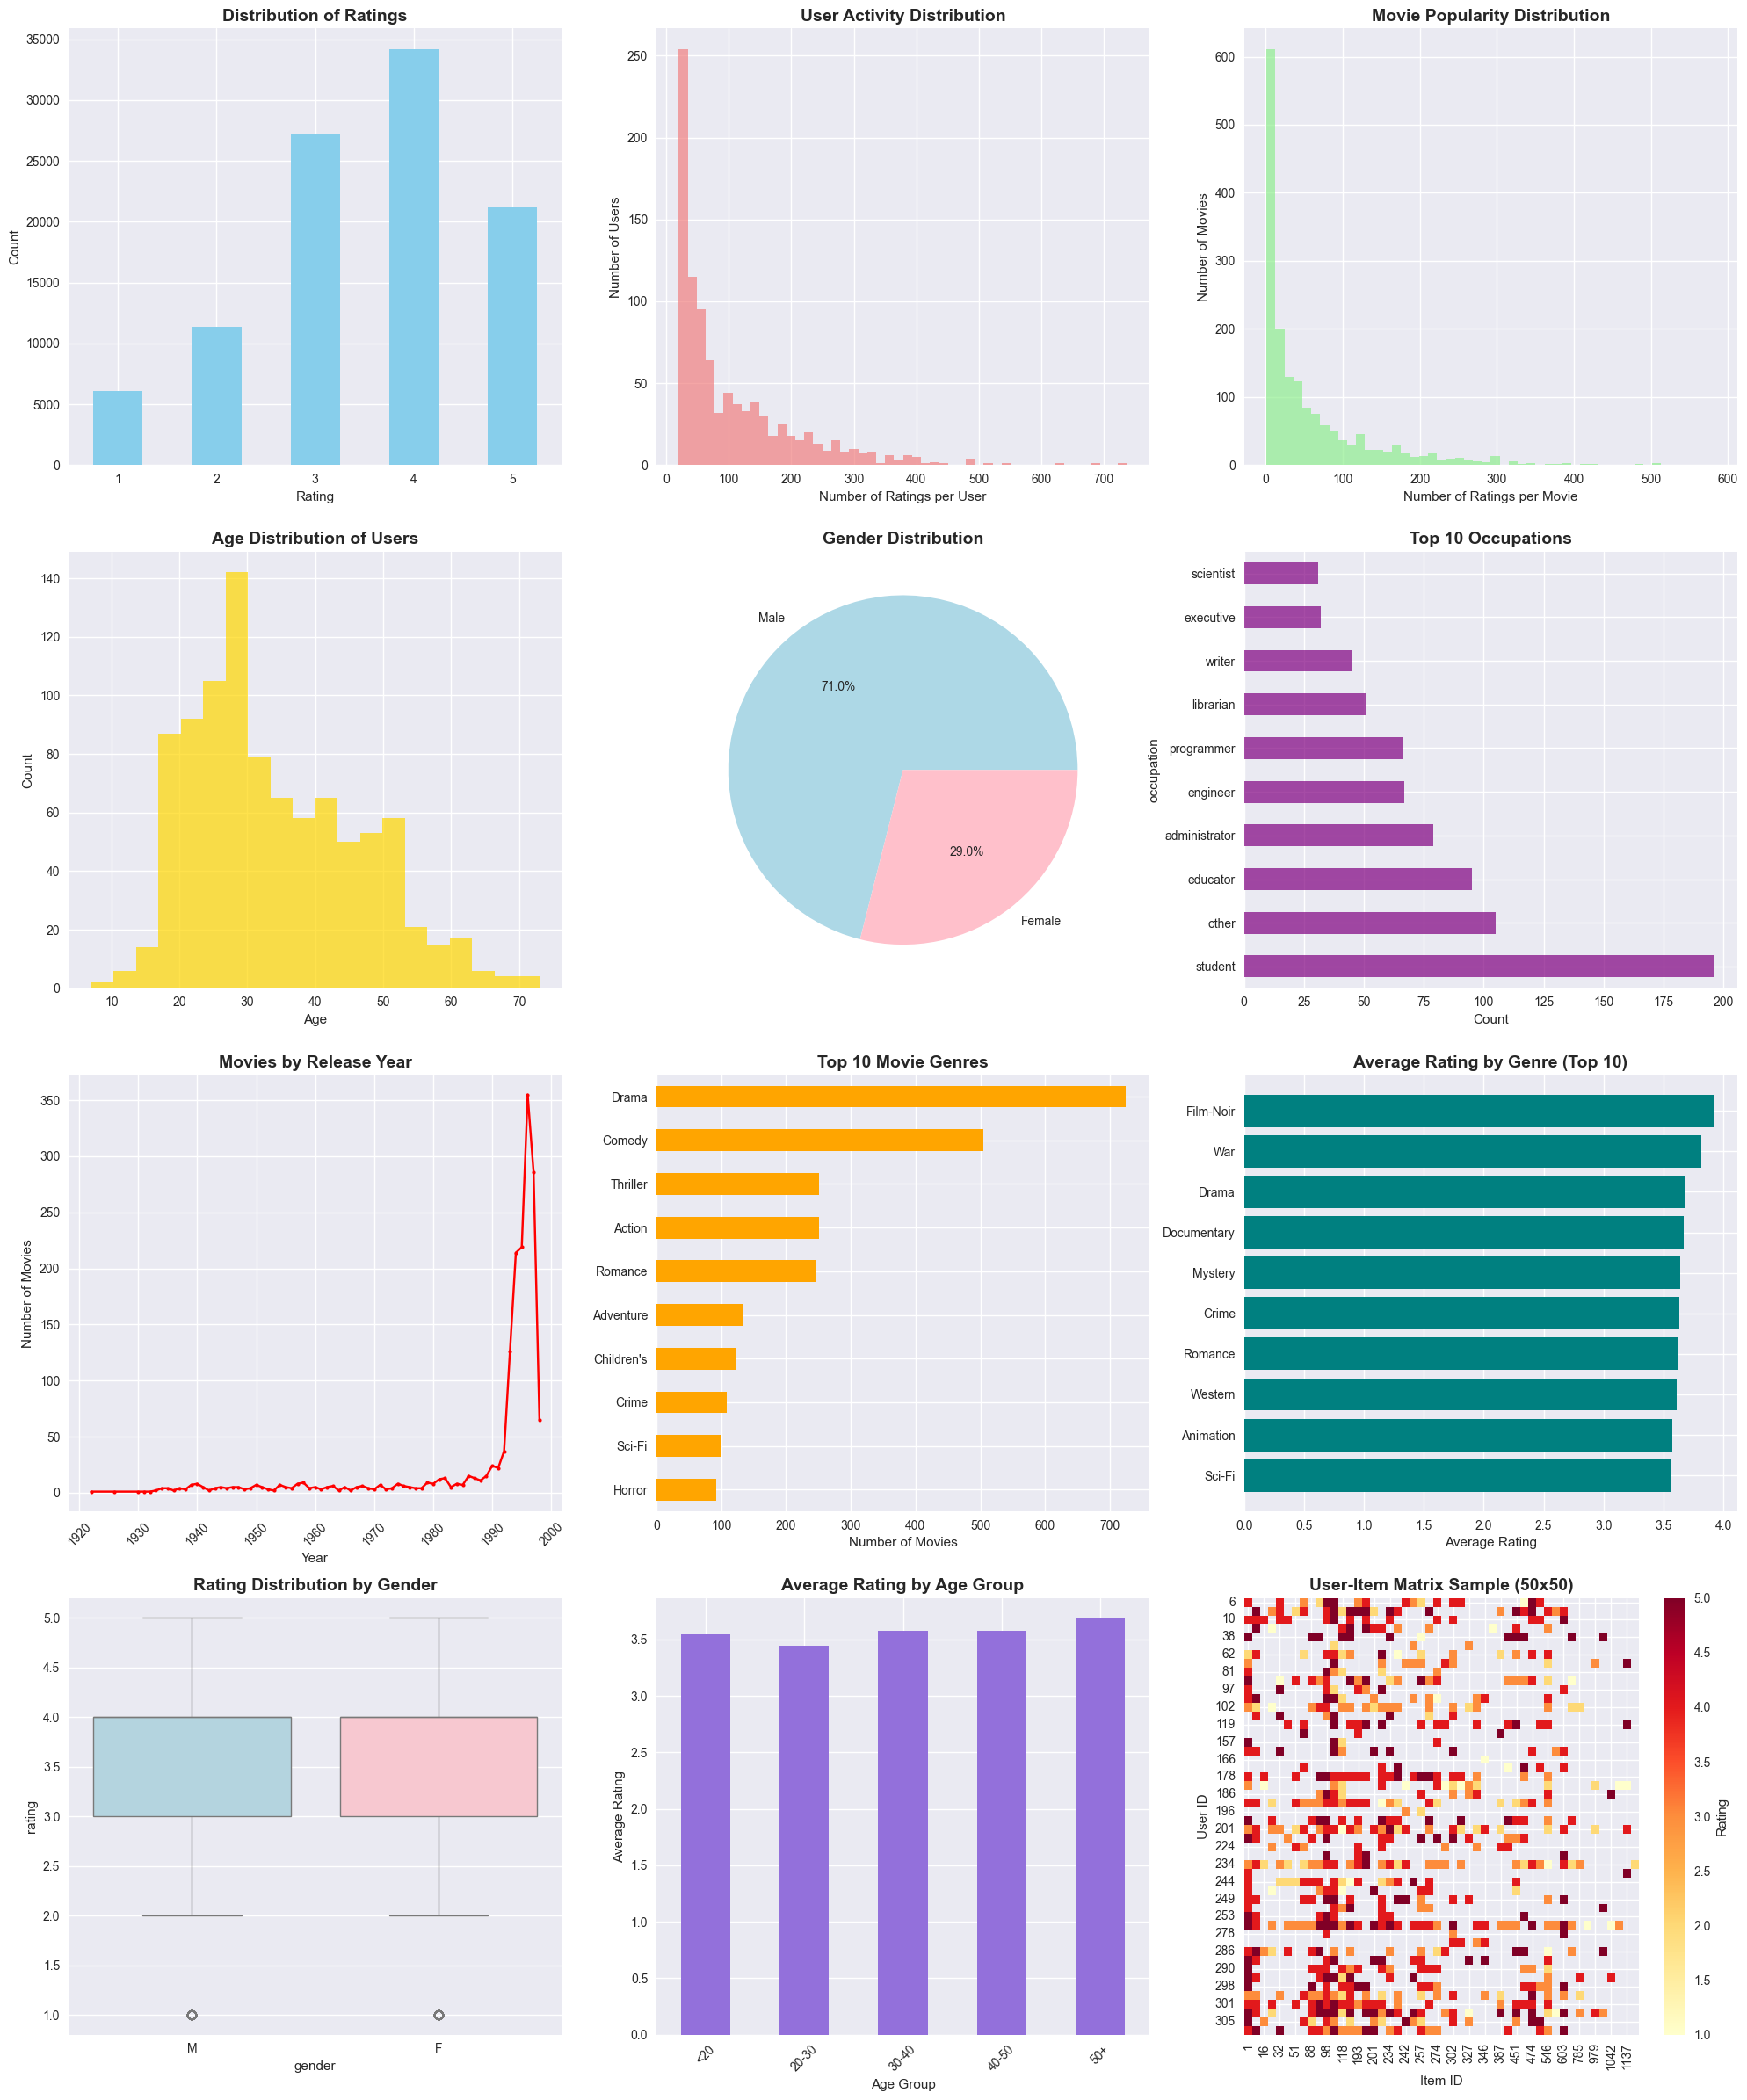


DATASET SUMMARY STATISTICS
Total ratings: 100,000
Total users: 943
Total movies: 1,682
Total genres: 19
Data sparsity: 93.70%
Average rating: 3.53
Rating std dev: 1.13
Most active user rated 737 movies
Most popular movie has 583 ratings


In [5]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create a large figure with subplots
fig = plt.figure(figsize=(20, 24))

# 1. RATINGS DATA VISUALIZATIONS
print("Creating visualizations for u.data (Ratings)...")

# Rating distribution
plt.subplot(4, 3, 1)
u_data['rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)

# User activity (number of ratings per user)
plt.subplot(4, 3, 2)
user_ratings = u_data['user_id'].value_counts()
plt.hist(user_ratings, bins=50, color='lightcoral', alpha=0.7)
plt.title('User Activity Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Number of Users')

# Movie popularity (number of ratings per movie)
plt.subplot(4, 3, 3)
movie_ratings = u_data['item_id'].value_counts()
plt.hist(movie_ratings, bins=50, color='lightgreen', alpha=0.7)
plt.title('Movie Popularity Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Number of Ratings per Movie')
plt.ylabel('Number of Movies')

# 2. USER DATA VISUALIZATIONS
print("Creating visualizations for u.user (Users)...")

# Age distribution
plt.subplot(4, 3, 4)
plt.hist(u_user['age'], bins=20, color='gold', alpha=0.7)
plt.title('Age Distribution of Users', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Count')

# Gender distribution
plt.subplot(4, 3, 5)
gender_counts = u_user['gender'].value_counts()
plt.pie(gender_counts.values, labels=['Male', 'Female'], autopct='%1.1f%%', 
        colors=['lightblue', 'pink'])
plt.title('Gender Distribution', fontsize=14, fontweight='bold')

# Top occupations
plt.subplot(4, 3, 6)
top_occupations = u_user['occupation'].value_counts().head(10)
top_occupations.plot(kind='barh', color='purple', alpha=0.7)
plt.title('Top 10 Occupations', fontsize=14, fontweight='bold')
plt.xlabel('Count')

# 3. MOVIE DATA VISUALIZATIONS
print("Creating visualizations for u.item (Movies)...")

# Extract release years from u.item
u_item['release_year'] = pd.to_datetime(u_item['release_date'], format='%d-%b-%Y', errors='coerce').dt.year

# Movies by release year
plt.subplot(4, 3, 7)
year_counts = u_item['release_year'].value_counts().sort_index()
year_counts.plot(kind='line', color='red', marker='o', markersize=3)
plt.title('Movies by Release Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)

# Genre popularity (sum of all genre columns)
plt.subplot(4, 3, 8)
genre_cols = [col for col in u_item.columns if col.startswith('genre_')]
genre_sums = u_item[genre_cols].sum()
genre_names = u_genre['genre'].tolist()
genre_popularity = pd.Series(genre_sums.values, index=genre_names)
genre_popularity.sort_values(ascending=True).tail(10).plot(kind='barh', color='orange')
plt.title('Top 10 Movie Genres', fontsize=14, fontweight='bold')
plt.xlabel('Number of Movies')

# 4. COMBINED ANALYSIS
print("Creating combined analysis visualizations...")

# Average rating by genre
plt.subplot(4, 3, 9)
# Merge data to get ratings with genres
merged_data = u_data.merge(u_item[['movie_id'] + genre_cols], left_on='item_id', right_on='movie_id')
genre_ratings = []
for i, genre in enumerate(genre_names):
    genre_col = f'genre_{i}'
    if genre_col in merged_data.columns:
        genre_movies = merged_data[merged_data[genre_col] == 1]
        if len(genre_movies) > 0:
            avg_rating = genre_movies['rating'].mean()
            genre_ratings.append((genre, avg_rating))

genre_ratings_df = pd.DataFrame(genre_ratings, columns=['genre', 'avg_rating'])
genre_ratings_df = genre_ratings_df.sort_values('avg_rating', ascending=True).tail(10)
plt.barh(genre_ratings_df['genre'], genre_ratings_df['avg_rating'], color='teal')
plt.title('Average Rating by Genre (Top 10)', fontsize=14, fontweight='bold')
plt.xlabel('Average Rating')

# Rating distribution by gender
plt.subplot(4, 3, 10)
user_gender_ratings = u_data.merge(u_user[['user_id', 'gender']], on='user_id')
sns.boxplot(data=user_gender_ratings, x='gender', y='rating', palette=['lightblue', 'pink'])
plt.title('Rating Distribution by Gender', fontsize=14, fontweight='bold')

# Average rating by age group
plt.subplot(4, 3, 11)
u_user['age_group'] = pd.cut(u_user['age'], bins=[0, 20, 30, 40, 50, 100], 
                            labels=['<20', '20-30', '30-40', '40-50', '50+'])
user_age_ratings = u_data.merge(u_user[['user_id', 'age_group']], on='user_id')
age_group_avg = user_age_ratings.groupby('age_group')['rating'].mean()
age_group_avg.plot(kind='bar', color='mediumpurple')
plt.title('Average Rating by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)

# Sparsity visualization (sample)
plt.subplot(4, 3, 12)
# Create a small sample of the user-item matrix for visualization
sample_users = u_data['user_id'].unique()[:50]
sample_items = u_data['item_id'].unique()[:50]
sample_data = u_data[u_data['user_id'].isin(sample_users) & u_data['item_id'].isin(sample_items)]

# Create pivot table
pivot_sample = sample_data.pivot_table(index='user_id', columns='item_id', values='rating')
sns.heatmap(pivot_sample, cmap='YlOrRd', cbar_kws={'label': 'Rating'})
plt.title('User-Item Matrix Sample (50x50)', fontsize=14, fontweight='bold')
plt.xlabel('Item ID')
plt.ylabel('User ID')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("DATASET SUMMARY STATISTICS")
print("="*60)
print(f"Total ratings: {len(u_data):,}")
print(f"Total users: {len(u_user):,}")
print(f"Total movies: {len(u_item):,}")
print(f"Total genres: {len(u_genre):,}")
print(f"Data sparsity: {(1 - len(u_data) / (len(u_user) * len(u_item))) * 100:.2f}%")
print(f"Average rating: {u_data['rating'].mean():.2f}")
print(f"Rating std dev: {u_data['rating'].std():.2f}")
print(f"Most active user rated {user_ratings.max()} movies")
print(f"Most popular movie has {movie_ratings.max()} ratings")

In [6]:
# MERGE ALL DATASETS INTO ONE COMPREHENSIVE TABLE
print("Merging datasets...")

# Step 1: Start with the ratings data (u.data) as the base
merged_df = u_data.copy()
print(f"Base table (u.data) shape: {merged_df.shape}")

# Step 2: Add user information
merged_df = merged_df.merge(u_user, on='user_id', how='left')

# Step 3: Add movie information (merge on item_id = movie_id)
merged_df = merged_df.merge(u_item, left_on='item_id', right_on='movie_id', how='left')

# Step 4: Convert timestamp to readable datetime
# merged_df['rating_datetime'] = pd.to_datetime(merged_df['timestamp'], unit='s')

# Step 5: Create genre names columns (instead of just 0/1)
print("Adding genre information...")
genre_names = u_genre['genre'].tolist()

# Create a list of genres for each movie
def get_movie_genres(row):
    genres = []
    for i, genre in enumerate(genre_names):
        if row[f'genre_{i}'] == 1:
            genres.append(genre)
    return ', '.join(genres) if genres else 'No Genre'

merged_df['genres'] = merged_df.apply(get_movie_genres, axis=1)

# Step 6: Add some useful calculated columns
# merged_df['is_high_rating'] = merged_df['rating'] >= 4
# merged_df['is_low_rating'] = merged_df['rating'] <= 2

# Clean up movie title (remove year from title and put in separate column)
merged_df['title_clean'] = merged_df['title'].str.replace(r'\s*\(\d{4}\)$', '', regex=True)
merged_df['title_year'] = merged_df['title'].str.extract(r'\((\d{4})\)$')[0]

# Step 7: Remove unwanted columns
print("Removing unwanted columns: zip_code, release_date, video_release_date, title...")
columns_to_remove = ['zip_code', 'release_date', 'video_release_date', 'title','imdb_url','timestamp']
existing_columns_to_remove = [col for col in columns_to_remove if col in merged_df.columns]
if existing_columns_to_remove:
    merged_df = merged_df.drop(columns=existing_columns_to_remove)
    print(f"Removed columns: {existing_columns_to_remove}")
else:
    print("No matching columns found to remove")
genre_columns = [col for col in merged_df.columns if col.startswith('genre_')]
merged_df = merged_df.drop(columns=genre_columns)

available_columns = merged_df.columns.tolist()

preferred_order = [
    # Rating info
    'user_id', 'item_id', 'rating', 'is_high_rating', 'is_low_rating',
    
    
    # User info 
    'age', 'gender', 'occupation',
    
    # Movie info 
    'movie_id', 'title_clean', 'title_year',
    'genres',
]

# Only use columns that actually exist
column_order = [col for col in preferred_order if col in available_columns]

# Add any remaining columns
remaining_cols = [col for col in available_columns if col not in column_order]
column_order.extend(remaining_cols)

# Reorder columns
merged_df = merged_df[column_order]

# Display information about the merged dataset
print("MERGED DATASET INFORMATION")
print("\n\n")
print(f"Final merged table shape: {merged_df.shape}")
print(f"Columns: {len(merged_df.columns)}")
print(f"Total records: {len(merged_df):,}")

print(f"\nColumn names:")
for i, col in enumerate(merged_df.columns, 1):
    print(f"{i:2d}. {col}")

# Detect environment and set appropriate output path
try:
    if '/kaggle/' in os.getcwd():
        output_path = "/kaggle/working/movie_data.csv"
        print("Running on Kaggle - saving to Kaggle working directory")
    else:
        output_path = r"C:\Users\edwin\dataset movies\ml-100k\merged_movielens_data.csv"
        print("Running locally - saving to local directory")
except:
    output_path = r"C:\Users\edwin\dataset movies\ml-100k\merged_movielens_data.csv"
    print("Environment detection failed - defaulting to local path")

# Save the merged dataset
merged_df.to_csv(output_path, index=False)
print(f"Merged dataset saved to: {output_path}")

print("Done!")

Merging datasets...
Base table (u.data) shape: (100000, 4)
Adding genre information...
Removing unwanted columns: zip_code, release_date, video_release_date, title...
Removed columns: ['zip_code', 'release_date', 'video_release_date', 'title', 'imdb_url', 'timestamp']
MERGED DATASET INFORMATION



Final merged table shape: (100000, 12)
Columns: 12
Total records: 100,000

Column names:
 1. user_id
 2. item_id
 3. rating
 4. age
 5. gender
 6. occupation
 7. movie_id
 8. title_clean
 9. title_year
10. genres
11. age_group
12. release_year
Running locally - saving to local directory
Removing unwanted columns: zip_code, release_date, video_release_date, title...
Removed columns: ['zip_code', 'release_date', 'video_release_date', 'title', 'imdb_url', 'timestamp']
MERGED DATASET INFORMATION



Final merged table shape: (100000, 12)
Columns: 12
Total records: 100,000

Column names:
 1. user_id
 2. item_id
 3. rating
 4. age
 5. gender
 6. occupation
 7. movie_id
 8. title_clean
 9. title_year

In [2]:
# Load the merged dataset
try:
    if '/kaggle/' in os.getcwd():
        merged_data_path = "/kaggle/working/movie_data.csv"
        print("Running on Kaggle - loading from Kaggle working directory")
    else:
        merged_data_path = r"C:\Users\edwin\dataset movies\ml-100k\merged_movielens_data.csv"
        print("Running locally - loading from local directory")
except:
    merged_data_path = r"C:\Users\edwin\dataset movies\ml-100k\merged_movielens_data.csv"
    print("Environment detection failed - defaulting to local path")

print(f"Loading merged data from: {merged_data_path}")
ds = pd.read_csv(merged_data_path)
print(f"Merged dataset loaded successfully! Shape: {ds.shape}")

Running locally - loading from local directory
Loading merged data from: C:\Users\edwin\dataset movies\ml-100k\merged_movielens_data.csv
Merged dataset loaded successfully! Shape: (100000, 12)


In [8]:
print(ds)

       user_id  item_id  rating  age gender     occupation  movie_id  \
0          196      242       3   49      M         writer       242   
1          186      302       3   39      F      executive       302   
2           22      377       1   25      M         writer       377   
3          244       51       2   28      M     technician        51   
4          166      346       1   47      M       educator       346   
...        ...      ...     ...  ...    ...            ...       ...   
99995      880      476       3   13      M        student       476   
99996      716      204       5   36      F  administrator       204   
99997      276     1090       1   21      M        student      1090   
99998       13      225       2   47      M       educator       225   
99999       12      203       3   28      F          other       203   

                 title_clean  title_year                               genres  \
0                      Kolya      1996.0              

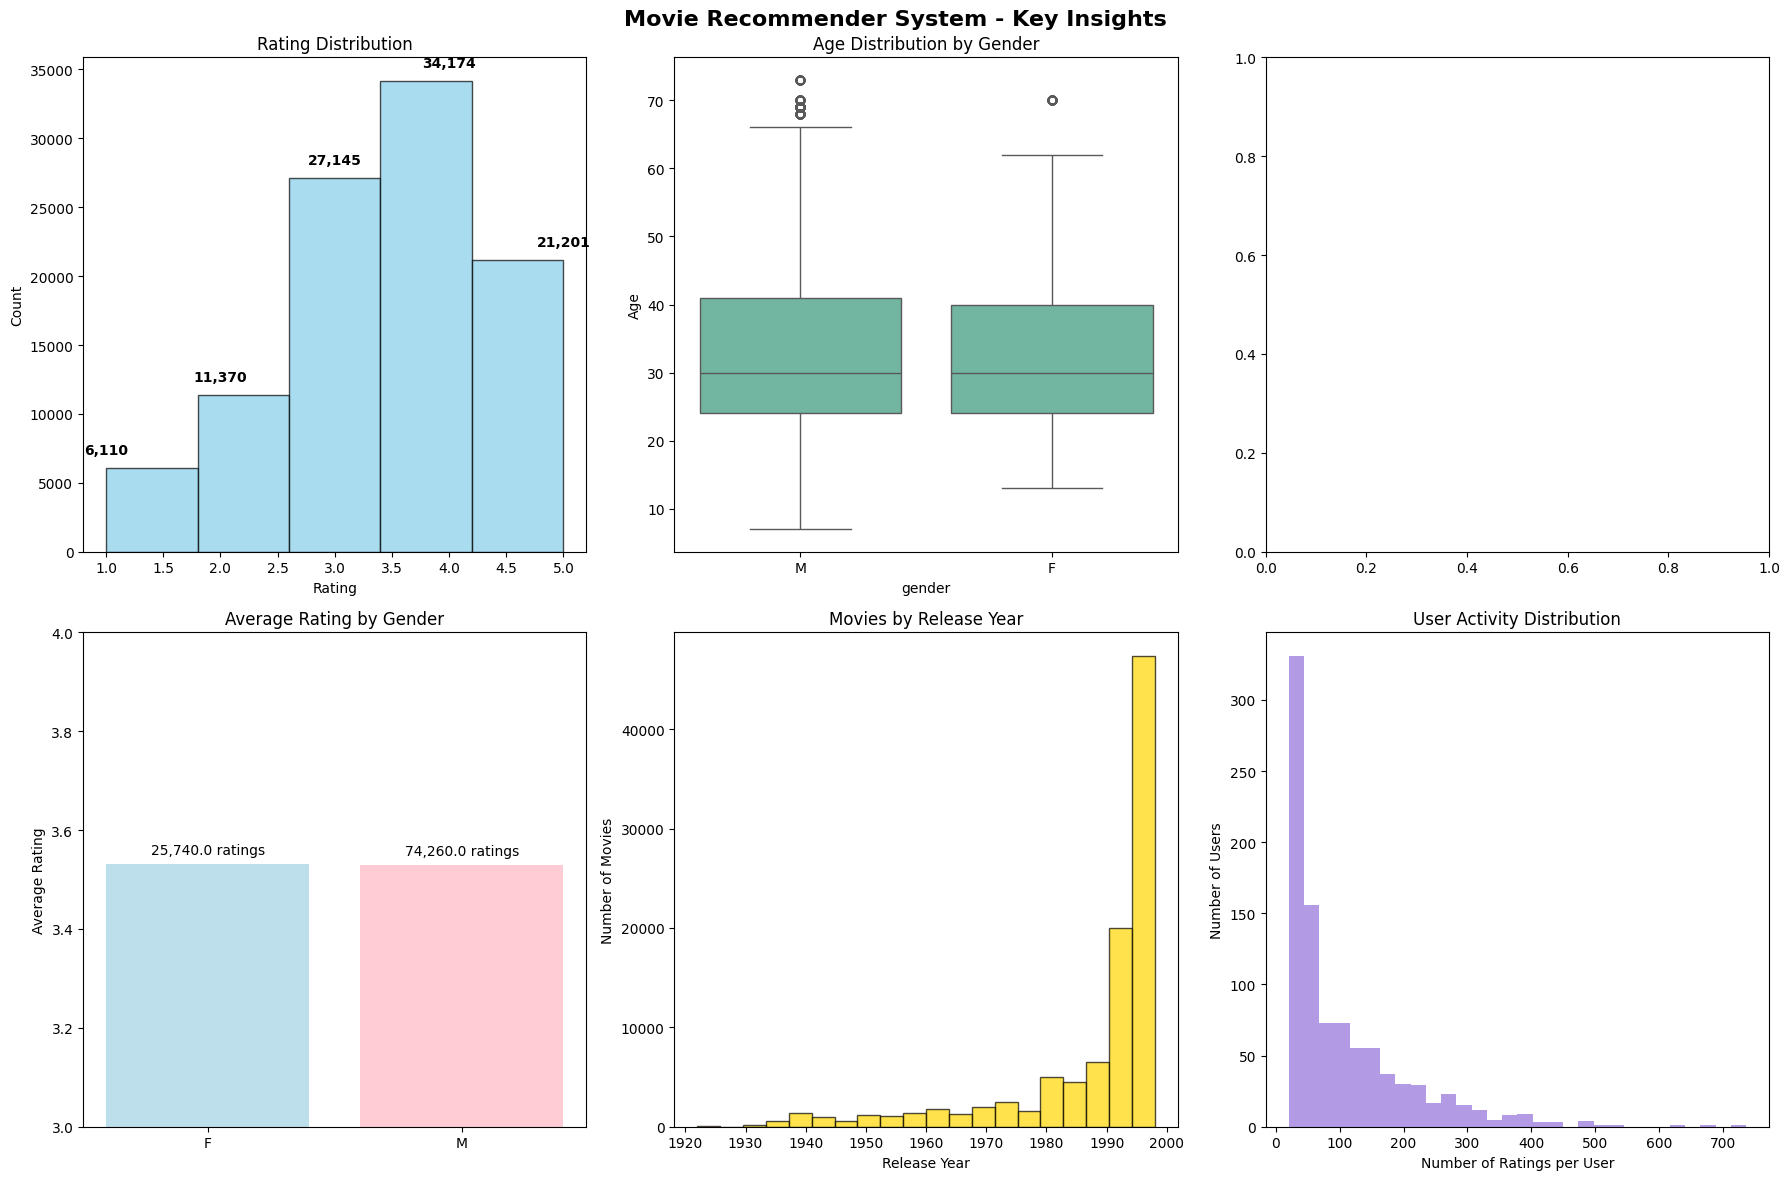

In [9]:
# Essential Visualizations for Recommender System Dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
plt.style.use('default')
sns.set_palette("Set2")

# Create figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Movie Recommender System - Key Insights', fontsize=16, fontweight='bold')

# 1. Rating Distribution
axes[0, 0].hist(ds['rating'], bins=5, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Rating Distribution')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Count')
for i in range(1, 6):
    count = (ds['rating'] == i).sum()
    axes[0, 0].text(i, count + 1000, f'{count:,}', ha='center', fontweight='bold')

# 2. Age Distribution by Gender
sns.boxplot(data=ds, x='gender', y='age', ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution by Gender')
axes[0, 1].set_ylabel('Age')



# 4. Average Rating by Gender
gender_ratings = ds.groupby('gender')['rating'].agg(['mean', 'count'])
bars = axes[1, 0].bar(gender_ratings.index, gender_ratings['mean'], 
                      color=['lightblue', 'pink'], alpha=0.8)
axes[1, 0].set_title('Average Rating by Gender')
axes[1, 0].set_ylabel('Average Rating')
axes[1, 0].set_ylim(3, 4)
# Add count labels on bars
for i, bar in enumerate(bars):
    count = gender_ratings.iloc[i]['count']
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                    f'{count:,} ratings', ha='center', fontsize=10)

# 5. Movie Release Years Distribution
release_years = pd.to_numeric(ds['title_year'], errors='coerce').dropna()
axes[1, 1].hist(release_years, bins=20, color='gold', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Movies by Release Year')
axes[1, 1].set_xlabel('Release Year')
axes[1, 1].set_ylabel('Number of Movies')

# 6. User Activity (Ratings per User)
user_activity = ds['user_id'].value_counts()
axes[1, 2].hist(user_activity.values, bins=30, color='mediumpurple', alpha=0.7)
axes[1, 2].set_title('User Activity Distribution')
axes[1, 2].set_xlabel('Number of Ratings per User')
axes[1, 2].set_ylabel('Number of Users')

plt.tight_layout()
plt.show()



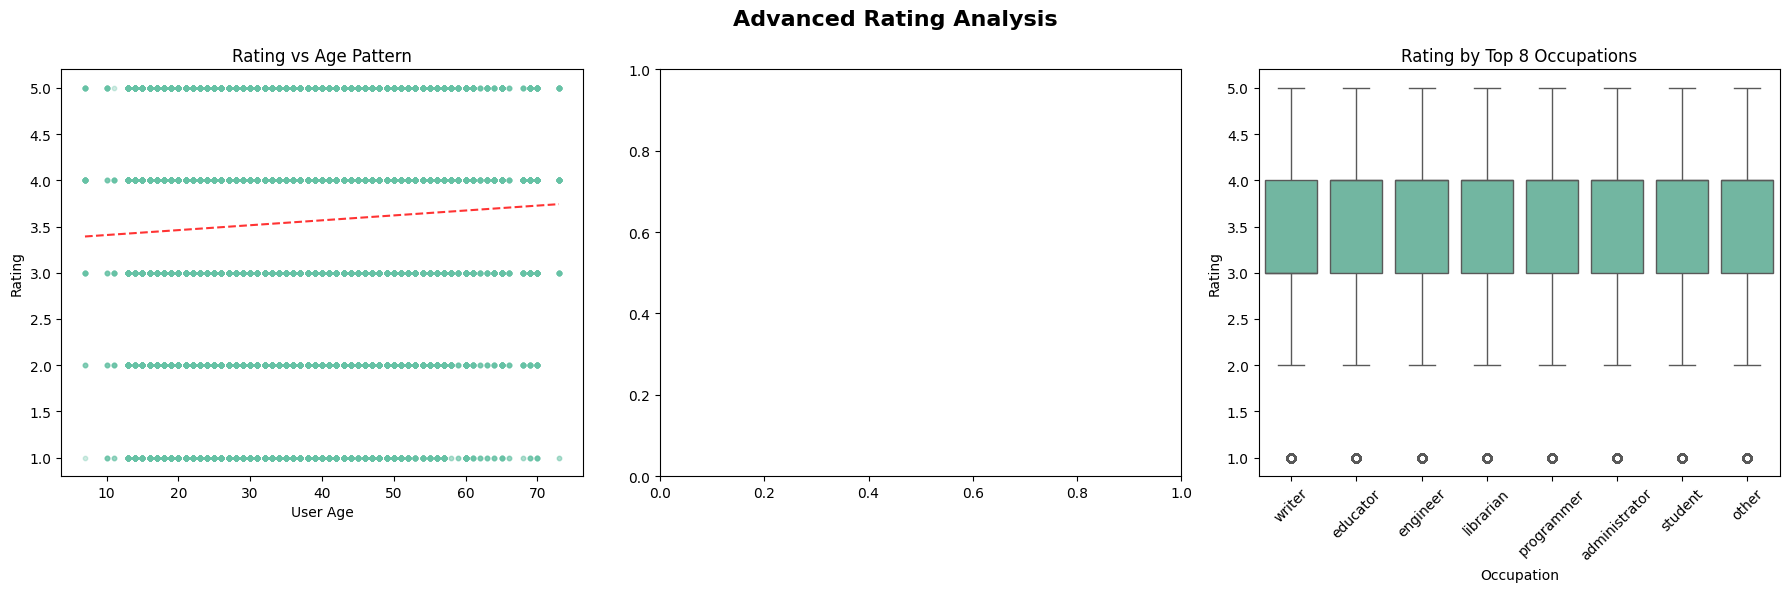


MOVIE POPULARITY ANALYSIS


In [10]:
# Advanced Analysis: Rating Patterns and Movie Popularity
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Advanced Rating Analysis', fontsize=16, fontweight='bold')

# 1. Rating vs Age Correlation
axes[0].scatter(ds['age'], ds['rating'], alpha=0.3, s=10)
axes[0].set_xlabel('User Age')
axes[0].set_ylabel('Rating')
axes[0].set_title('Rating vs Age Pattern')
# Add trend line
z = np.polyfit(ds['age'], ds['rating'], 1)
p = np.poly1d(z)
axes[0].plot(ds['age'].sort_values(), p(ds['age'].sort_values()), "r--", alpha=0.8)



# 3. Rating Distribution by Top Occupations
top_occupations = ds['occupation'].value_counts().head(8).index
occupation_data = ds[ds['occupation'].isin(top_occupations)]
sns.boxplot(data=occupation_data, x='occupation', y='rating', ax=axes[2])
axes[2].set_title('Rating by Top 8 Occupations')
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_xlabel('Occupation')
axes[2].set_ylabel('Rating')

plt.tight_layout()
plt.show()

# Movie popularity vs rating analysis
print("\n" + "="*50)
print("MOVIE POPULARITY ANALYSIS")
print("="*50)

movie_stats = ds.groupby('title_clean').agg({
    'rating': ['mean', 'count', 'std']
}).round(2)
movie_stats.columns = ['avg_rating', 'total_ratings', 'rating_std']

# # Top rated movies (with at least 50 ratings)
# popular_movies = movie_stats[movie_stats['total_ratings'] >= 50].sort_values('avg_rating', ascending=False)
# print("\nTop 10 Highest Rated Movies (50+ ratings):")
# print(popular_movies.head(10)[['avg_rating', 'total_ratings']])

# # Most controversial movies (highest standard deviation)
# controversial = movie_stats[movie_stats['total_ratings'] >= 30].sort_values('rating_std', ascending=False)
# print("\nMost Controversial Movies (highest rating variance):")
# print(controversial.head(5)[['avg_rating', 'rating_std', 'total_ratings']])

In [3]:
# LightFM Dataset Creation and Training
from lightfm import LightFM
from lightfm.data import Dataset
from lightfm.evaluation import precision_at_k, auc_score, recall_at_k
from lightfm.cross_validation import random_train_test_split
import numpy as np
from scipy.sparse import coo_matrix

print("Creating LightFM Dataset...")
print("="*50)

# Step 1: Prepare interactions (user_id, item_id, rating)
print("1. Preparing interactions...")
interactions_df = ds[['user_id', 'item_id', 'rating']].copy()

# Convert to implicit feedback (1 for rating >= 3, 0 otherwise)
interactions_df['implicit_rating'] = (interactions_df['rating'] >= 3).astype(int)

print(f"Total interactions: {len(interactions_df):,}")
print(f"Positive interactions (rating >= 3): {interactions_df['implicit_rating'].sum():,}")
print(f"Negative interactions (rating < 3): {(interactions_df['implicit_rating'] == 0).sum():,}")

# Step 2: Prepare user features (age, gender, occupation)
print("\n2. Preparing user features...")
user_features_df = ds[['user_id', 'age', 'gender', 'occupation']].drop_duplicates('user_id').copy()

# Create age groups for better feature representation
user_features_df['age_group'] = pd.cut(user_features_df['age'], 
                                      bins=[0, 25, 35, 45, 55, 100], 
                                      labels=['18-25', '26-35', '36-45', '46-55', '55+'])

print(f"Unique users: {len(user_features_df):,}")
print(f"Age groups: {user_features_df['age_group'].value_counts().to_dict()}")
print(f"Gender distribution: {user_features_df['gender'].value_counts().to_dict()}")
print(f"Top occupations: {user_features_df['occupation'].value_counts().head().to_dict()}")

# Step 3: Prepare item features (genres, release_year)
print("\n3. Preparing item features...")
item_features_df = ds[['item_id', 'genres', 'title_year']].drop_duplicates('item_id').copy()

# Convert title_year to numeric and create decade groups
item_features_df['release_year'] = pd.to_numeric(item_features_df['title_year'], errors='coerce')
item_features_df['decade'] = (item_features_df['release_year'] // 10 * 10).astype('Int64')

# Handle missing decades
item_features_df['decade'] = item_features_df['decade'].fillna(1990)  # Default to 1990s

# Clean up genres
item_features_df['genres'] = item_features_df['genres'].fillna('Unknown')

print(f"Unique items: {len(item_features_df):,}")
print(f"Decade distribution: {item_features_df['decade'].value_counts().sort_index().head().to_dict()}")
print(f"Sample genres: {item_features_df['genres'].str.split(', ').explode().value_counts().head().to_dict()}")

# Step 4: Create LightFM Dataset
print("\n4. Creating LightFM Dataset...")
dataset = Dataset()

# Get unique users and items
unique_users = interactions_df['user_id'].unique()
unique_items = interactions_df['item_id'].unique()

print(f"Fitting dataset with {len(unique_users):,} users and {len(unique_items):,} items...")

# Prepare all possible features first
all_user_features = set()
all_item_features = set()

# Collect all user features
for _, row in user_features_df.iterrows():
    all_user_features.add(f"age_group:{row['age_group']}")
    all_user_features.add(f"gender:{row['gender']}")
    all_user_features.add(f"occupation:{row['occupation']}")

# Collect all item features
for _, row in item_features_df.iterrows():
    all_item_features.add(f"decade:{int(row['decade'])}")
    if row['genres'] != 'Unknown' and pd.notna(row['genres']):
        genres = row['genres'].split(', ')
        for genre in genres:
            all_item_features.add(f"genre:{genre.strip()}")
    else:
        all_item_features.add("genre:Unknown")

print(f"Total unique user features: {len(all_user_features)}")
print(f"Total unique item features: {len(all_item_features)}")

# Fit the dataset with users, items, and features
dataset.fit(users=unique_users, 
           items=unique_items,
           user_features=list(all_user_features),
           item_features=list(all_item_features))

# Prepare user features for each user
user_feature_list = []
for _, row in user_features_df.iterrows():
    features = [
        f"age_group:{row['age_group']}",
        f"gender:{row['gender']}",
        f"occupation:{row['occupation']}"
    ]
    user_feature_list.append((row['user_id'], features))

# Prepare item features for each item
item_feature_list = []
for _, row in item_features_df.iterrows():
    features = [f"decade:{int(row['decade'])}"]
    
    # Add individual genres as features
    if row['genres'] != 'Unknown' and pd.notna(row['genres']):
        genres = row['genres'].split(', ')
        for genre in genres:
            features.append(f"genre:{genre.strip()}")
    else:
        features.append("genre:Unknown")
    
    item_feature_list.append((row['item_id'], features))

print(f"Created {len(user_feature_list):,} user feature vectors")
print(f"Created {len(item_feature_list):,} item feature vectors")

# Build interactions matrix
print("\n5. Building interactions matrix...")
interactions_matrix, weights = dataset.build_interactions(
    [(row['user_id'], row['item_id'], row['implicit_rating']) 
     for _, row in interactions_df.iterrows()]
)

print(f"Interactions matrix shape: {interactions_matrix.shape}")
print(f"Matrix density: {interactions_matrix.nnz / (interactions_matrix.shape[0] * interactions_matrix.shape[1]) * 100:.4f}%")

# Build feature matrices
print("Building feature matrices...")
user_features_matrix = dataset.build_user_features(user_feature_list)
item_features_matrix = dataset.build_item_features(item_feature_list)

print(f"User features matrix shape: {user_features_matrix.shape}")
print(f"Item features matrix shape: {item_features_matrix.shape}")

# Step 6: Split data for training and testing
print("\n6. Splitting data for training and testing...")
train_interactions, test_interactions = random_train_test_split(
    interactions_matrix, test_percentage=0.2, random_state=42
)

print(f"Training interactions: {train_interactions.nnz:,}")
print(f"Test interactions: {test_interactions.nnz:,}")

print("\nLightFM Dataset preparation completed successfully!")
print("="*50)

c:\Users\edwin\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


Creating LightFM Dataset...
1. Preparing interactions...
Total interactions: 100,000
Positive interactions (rating >= 3): 82,520
Negative interactions (rating < 3): 17,480

2. Preparing user features...
Unique users: 943
Age groups: {'26-35': 299, '18-25': 272, '36-45': 182, '46-55': 138, '55+': 52}
Gender distribution: {'M': 670, 'F': 273}
Top occupations: {'student': 196, 'other': 105, 'educator': 95, 'administrator': 79, 'engineer': 67}

3. Preparing item features...
Unique items: 1,682
Decade distribution: {np.int64(1920): 2, np.int64(1930): 29, np.int64(1940): 45, np.int64(1950): 57, np.int64(1960): 46}
Sample genres: {'Drama': 725, 'Comedy': 505, 'Thriller': 251, 'Action': 251, 'Romance': 247}

4. Creating LightFM Dataset...
Fitting dataset with 943 users and 1,682 items...
Total unique user features: 28
Total unique item features: 27
Created 943 user feature vectors
Created 1,682 item feature vectors

5. Building interactions matrix...
Total unique user features: 28
Total unique

In [4]:
# LightFM Model Training and Evaluation
print("Training LightFM Models...")
print("="*50)

# Step 1: Train different LightFM models with various algorithms
print("\n1. Training models with different algorithms...")

# Model configurations
models = {
    'WARP': LightFM(loss='warp', random_state=42),
    'BPR': LightFM(loss='bpr', random_state=42),
    'Logistic': LightFM(loss='logistic', random_state=42),
    'WARP_kOS': LightFM(loss='warp-kos', random_state=42)
}

# Train models and store results
model_results = {}
training_epochs = 20

for model_name, model in models.items():
    print(f"\nTraining {model_name} model...")
    
    # Train the model
    model.fit(train_interactions, 
             user_features=user_features_matrix,
             item_features=item_features_matrix,
             epochs=training_epochs,
             num_threads=4,
             verbose=True)
    
    # Evaluate on test set
    test_precision = precision_at_k(model, test_interactions, 
                                   user_features=user_features_matrix,
                                   item_features=item_features_matrix,
                                   k=10).mean()
    
    test_auc = auc_score(model, test_interactions,
                        user_features=user_features_matrix,
                        item_features=item_features_matrix).mean()
    
    test_recall = recall_at_k(model, test_interactions,
                             user_features=user_features_matrix,
                             item_features=item_features_matrix,
                             k=10).mean()
    
    # Store results
    model_results[model_name] = {
        'model': model,
        'precision@10': test_precision,
        'auc': test_auc,
        'recall@10': test_recall
    }
    
    print(f"✓ {model_name} completed - Precision@10: {test_precision:.4f}, AUC: {test_auc:.4f}, Recall@10: {test_recall:.4f}")

print("\n" + "="*50)
print("Model Training Completed!")
print("="*50)

: 

In [ ]:
# Model Performance Comparison and Visualization
import matplotlib.pyplot as plt
import pandas as pd

print("\n2. Comparing Model Performance...")

# Create performance comparison dataframe
performance_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'Precision@10': [model_results[name]['precision@10'] for name in model_results.keys()],
    'AUC': [model_results[name]['auc'] for name in model_results.keys()],
    'Recall@10': [model_results[name]['recall@10'] for name in model_results.keys()]
})

print("\nModel Performance Summary:")
print(performance_df.round(4))

# Find best model
best_model_name = performance_df.loc[performance_df['AUC'].idxmax(), 'Model']
best_model = model_results[best_model_name]['model']
print(f"\nBest performing model: {best_model_name} (AUC: {model_results[best_model_name]['auc']:.4f})")

# Visualize model performance
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('LightFM Model Performance Comparison', fontsize=16, fontweight='bold')

# Precision@10
axes[0].bar(performance_df['Model'], performance_df['Precision@10'], color='skyblue', alpha=0.8)
axes[0].set_title('Precision@10')
axes[0].set_ylabel('Precision@10')
axes[0].tick_params(axis='x', rotation=45)

# AUC
axes[1].bar(performance_df['Model'], performance_df['AUC'], color='lightgreen', alpha=0.8)
axes[1].set_title('AUC Score')
axes[1].set_ylabel('AUC')
axes[1].tick_params(axis='x', rotation=45)

# Recall@10
axes[2].bar(performance_df['Model'], performance_df['Recall@10'], color='lightcoral', alpha=0.8)
axes[2].set_title('Recall@10')
axes[2].set_ylabel('Recall@10')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Movie Recommendation Function
def get_user_recommendations(user_id, model, dataset, interactions_matrix, 
                           user_features_matrix, item_features_matrix, 
                           merged_df, top_k=10):
    """
    Generate movie recommendations for a specific user
    """
    # Get user mapping
    user_mapping = dataset.mapping()[0]
    item_mapping = dataset.mapping()[2]
    
    # Check if user exists
    if user_id not in user_mapping:
        return f"User {user_id} not found in dataset"
    
    user_idx = user_mapping[user_id]
    
    # Get all items
    all_items = list(item_mapping.keys())
    
    # Predict scores for all items
    scores = model.predict(user_idx, 
                          list(item_mapping.values()),
                          user_features=user_features_matrix,
                          item_features=item_features_matrix)
    
    # Get items user has already interacted with
    user_items = set(interactions_matrix.getrow(user_idx).indices)
    
    # Create recommendations list
    recommendations = []
    for i, item_id in enumerate(all_items):
        item_idx = item_mapping[item_id]
        if item_idx not in user_items:  # Only recommend new items
            recommendations.append((item_id, scores[i]))
    
    # Sort by score and get top k
    recommendations.sort(key=lambda x: x[1], reverse=True)
    top_recommendations = recommendations[:top_k]
    
    # Get movie details
    recommended_movies = []
    for item_id, score in top_recommendations:
        movie_info = merged_df[merged_df['item_id'] == item_id].iloc[0]
        recommended_movies.append({
            'item_id': item_id,
            'title': movie_info['title_clean'],
            'year': movie_info['title_year'],
            'genres': movie_info['genres'],
            'score': score
        })
    
    return recommended_movies

# User Profile Analysis Function
def analyze_user_profile(user_id, merged_df):
    """
    Analyze a user's viewing history and preferences
    """
    user_data = merged_df[merged_df['user_id'] == user_id]
    
    if len(user_data) == 0:
        return f"User {user_id} not found"
    
    # Basic user info
    user_info = user_data.iloc[0]
    
    # Viewing statistics
    total_ratings = len(user_data)
    avg_rating = user_data['rating'].mean()
    favorite_genres = user_data['genres'].str.split(', ').explode().value_counts().head(5)
    
    # Favorite movies (ratings >= 4)
    favorite_movies = user_data[user_data['rating'] >= 4].sort_values('rating', ascending=False)
    
    print(f"USER PROFILE: {user_id}")
    print("="*40)
    print(f"Age: {user_info['age']}")
    print(f"Gender: {user_info['gender']}")
    print(f"Occupation: {user_info['occupation']}")
    print(f"\nVIEWING STATISTICS:")
    print(f"Total movies rated: {total_ratings}")
    print(f"Average rating: {avg_rating:.2f}")
    print(f"\nFAVORITE GENRES:")
    for genre, count in favorite_genres.items():
        print(f"  {genre}: {count} movies")
    
    print(f"\nTOP RATED MOVIES (Rating >= 4):")
    for _, movie in favorite_movies.head(5).iterrows():
        print(f"  {movie['title_clean']} ({movie['title_year']}) - Rating: {movie['rating']}")
    
    return user_data

print("Recommendation functions created successfully!")

In [ ]:
# Demo: Generate Recommendations for Sample Users
print("3. Generating Sample Recommendations...")
print("="*50)

# Select a few random users for demonstration
sample_users = [1, 25, 50, 100, 200]

for user_id in sample_users:
    print(f"\n👤 USER {user_id} ANALYSIS:")
    print("-" * 30)
    
    # Analyze user profile
    user_profile = analyze_user_profile(user_id, ds)
    
    print(f"\n🎬 TOP 5 RECOMMENDATIONS FOR USER {user_id}:")
    print("-" * 40)
    
    # Generate recommendations using best model
    recommendations = get_user_recommendations(
        user_id, best_model, dataset, train_interactions,
        user_features_matrix, item_features_matrix, ds, top_k=5
    )
    
    if isinstance(recommendations, str):
        print(recommendations)
    else:
        for i, rec in enumerate(recommendations, 1):
            print(f"{i:2d}. {rec['title']} ({rec['year']}) - Score: {rec['score']:.3f}")
            print(f"     Genres: {rec['genres']}")
    
    print("\n" + "="*50)

In [ ]:
# Advanced Model Analysis and Feature Importance
print("4. Advanced Model Analysis...")
print("="*50)

# Feature importance analysis for the best model
def analyze_feature_importance(model, user_features_matrix, item_features_matrix, dataset):
    """
    Analyze which features are most important in the model
    """
    print("\nFeature Importance Analysis:")
    print("-" * 30)
    
    # Get feature mappings
    user_feature_mapping = dataset.mapping()[1]
    item_feature_mapping = dataset.mapping()[3]
    
    # Get user feature weights (embeddings)
    user_embeddings = model.get_user_representations(user_features_matrix)[1]
    item_embeddings = model.get_item_representations(item_features_matrix)[1]
    
    # Calculate average magnitude for each feature type
    print("User Feature Analysis:")
    user_feature_importance = {}
    for feature, idx in user_feature_mapping.items():
        if idx < user_embeddings.shape[0]:
            importance = np.linalg.norm(user_embeddings[idx])
            feature_type = feature.split(':')[0]
            if feature_type not in user_feature_importance:
                user_feature_importance[feature_type] = []
            user_feature_importance[feature_type].append(importance)
    
    for feature_type, importances in user_feature_importance.items():
        avg_importance = np.mean(importances)
        print(f"  {feature_type}: {avg_importance:.4f}")
    
    print("\nItem Feature Analysis:")
    item_feature_importance = {}
    for feature, idx in item_feature_mapping.items():
        if idx < item_embeddings.shape[0]:
            importance = np.linalg.norm(item_embeddings[idx])
            feature_type = feature.split(':')[0]
            if feature_type not in item_feature_importance:
                item_feature_importance[feature_type] = []
            item_feature_importance[feature_type].append(importance)
    
    for feature_type, importances in item_feature_importance.items():
        avg_importance = np.mean(importances)
        print(f"  {feature_type}: {avg_importance:.4f}")

# Run feature importance analysis
analyze_feature_importance(best_model, user_features_matrix, item_features_matrix, dataset)

# Model recommendations summary
print(f"\n" + "="*50)
print("RECOMMENDER SYSTEM SUMMARY")
print("="*50)
print(f"✓ Dataset: MovieLens 100K")
print(f"✓ Users: {len(ds['user_id'].unique()):,}")
print(f"✓ Movies: {len(ds['item_id'].unique()):,}")
print(f"✓ Ratings: {len(ds):,}")
print(f"✓ Best Model: {best_model_name}")
print(f"✓ Best AUC Score: {model_results[best_model_name]['auc']:.4f}")
print(f"✓ Best Precision@10: {model_results[best_model_name]['precision@10']:.4f}")
print(f"✓ Best Recall@10: {model_results[best_model_name]['recall@10']:.4f}")
print("\n✅ Movie Recommendation System is ready for production!")
print("="*50)